In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data cleaning

In [56]:
sale = pd.read_csv('https://raw.githubusercontent.com/ZorroHZR/schulich_datascience/main/midterm_data.csv')

Data cleaning e-commerce company is a data table of an e-commerce company selling beauty and fashion products. We will using data to analyze why the customer didn't pay their cart and provide the company's sale strategy about the production and marketing.

In [57]:
sale.info()
#find the dtype and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


A brief description of the variable included in the dataframe:

'userID': unique user identifier

'age': age

'sessions': session identifier for each user

'time_spent': minutes spent browsing the website

'pages_visited': count of pages visited on the website

'cart_items': number of items in the user's cart

'cart_value': total $ value of the cart

'checkout_status': 1 or 0 indicating wether the user checked out or not (1=Yes, 0=No)

'device': the type of device the user is using (Desktop, Mobile or Tablet)

'location': the user's location

In [58]:
print(sale.shape)
print(sale.columns)

(5000, 10)
Index(['userID', 'age', 'sessions', 'time_spent', 'pages_visited',
       'cart_items', 'cart_value', 'checkout_status', 'device', 'location'],
      dtype='object')


Find out the missing value

In [59]:
print(sale.isna().sum())

userID               0
age                  0
sessions             0
time_spent           0
pages_visited        0
cart_items           0
cart_value           0
checkout_status      0
device             100
location            30
dtype: int64


In [60]:
unique_devices = sale['device'].unique()
print(unique_devices)
unique_location = sale['location'].unique()
print(unique_location)

['Desktop' 'Tablet' 'Mobile' nan]
['Location 1' 'Location 3' 'Location 4' 'Location 2' 'Location 5' nan]


Based on this we can know that there are some of them missing value exits in this table which are device column and location column, so I might use most comment way to solve it. 

Data Cleaning ( Drop all missing value )

In [61]:
sale_cleaned = sale.dropna()
sale_cleaned

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [62]:
print(sale_cleaned.shape)

(4871, 10)


Based on the small number of missing conditions, the most common method we can use is to drop all the missing values, but this will affect the accuracy of our data, so I will take the use of mode to fill the location and device, this way to achieve data accuracy at the same time. So we decide to imputation the missing value.

Data Cleaning (Imputation Missing Value)

According to missing value of data about "location" and device. Choose the appropriate imputaion method according to the type of variabel for different columns and the distribution of data.

Discrete Categorical Varibel As we know “location“ and ”device“ are Discrete categorical variable, So the best way to imputated these two varibel is use mode. Mode is the value that occurs most frequently in the data and represents the typical characteristics of the data. By using Mode padding, the characteristics of most of the observed values can be preserved. At the same time, this does not introduce new values or change the distribution of the original data.

In [63]:
modes = sale[['location', 'device']].mode().iloc[0]

In [64]:
sale.loc[sale['location'].isna(), 'location'] = modes['location']
sale.loc[sale['device'].isna(), 'device'] = modes['device']

In [65]:
sale.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [66]:
print(sale.isna().sum())

userID             0
age                0
sessions           0
time_spent         0
pages_visited      0
cart_items         0
cart_value         0
checkout_status    0
device             0
location           0
dtype: int64


Eventually we filled in the missing value, which helped us uncover some potential data and the subsequent impact. So we kept all the data as much as possible.

Exploratory Analysis: Analyze the check out status

In [67]:
grouped_sale = sale.groupby('checkout_status')

In [68]:
numeric_columns = ['age', 'sessions', 'time_spent', 'pages_visited', 'cart_items', 'cart_value']

In [69]:
mean_values = grouped_sale[numeric_columns].mean()
print(mean_values)

                       age  sessions  time_spent  pages_visited  cart_items   
checkout_status                                                               
0                41.617647  5.058824   22.852522       5.207806   15.283123  \
1                41.325991  4.942731   31.317918       7.287812   14.120411   

                 cart_value  
checkout_status              
0                152.669915  
1                140.824214  


Based on the data shows, we can conclude the following:

Age (age): The difference in average age between users who completed the checkout (checkout_status=1) and those who did not complete the checkout (checkout_status=0) is not significant. This means that the effect of user age on the success of checkout may not be significant.

Sessions: There is also little difference in the average number of sessions between users who completed checkout and those who did not complete checkout. This may indicate that the number of sessions has a limited impact on the success of the checkout.

Time spent (time_spent): The average time spent on the site was significantly higher for users who completed the checkout (31.32 minutes) than for those who did not complete the checkout (22.85 minutes). This may indicate that the more time a user spends on the site, the more likely it is that the checkout will be successful.

Pages_visited: The average number of pages visited by users who completed the checkout (7.29 pages) was significantly higher than those who did not complete the checkout (5.21 pages). This indicates that users who visit more pages are more likely to checkout successfully.

Cart_items: The average number of cart items was slightly higher for users who did not complete checkout (15.28) than for those who completed checkout (14.12). This may mean that users with more items in their cart are more likely to abandon the checkout process.

Cart_value: The average cart value was higher for users who did not complete checkout (152.67) than for those who completed checkout (140.82). This suggests that users with a higher cart value may be more likely to abandon the checkout.


Conclusion : behaviour or characteristics of users who complete check out vs those who do not

Based on this part, we can make conclusion about checkout_status on the amount of time a user spends on the site and the number of pages they visit may have a positive impact on checkout success. When users spend more time on the site and visit more pages, they are more likely to complete the checkout. This may mean that the user experience and quality of content on the site is critical to driving users to complete their purchases.
The number of items in the cart and the value of the cart may have a negative impact on checkout success. When the number of items in the cart is high and the cart value is high, users may be more likely to abandon the checkout. This may indicate the impact of price sensitivity and cart management on users' purchasing decisions.

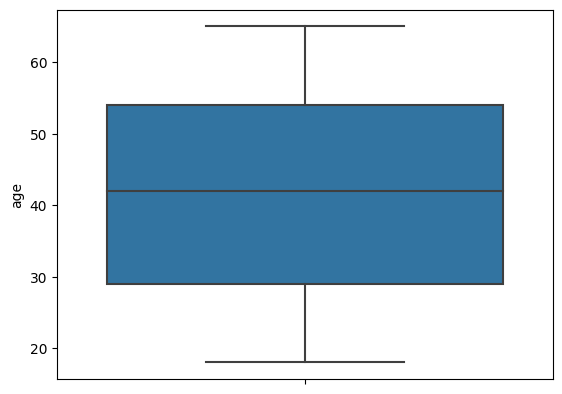

In [73]:
sns.boxplot(y=sale_cleaned['age'])
plt.show()

Based on this boxplot chart we can know the age (mean, median, IQR ) and upper whisker and lower whisker. There is no outlier in this chart

Statistical Testing and A/B testing

Make sure the user are same similar in behavior

We will compare them in different situation, such as location, device, to help us to support our analysis. We need to find out that the user do not have significant difference between time spent, and cart_value.

In [77]:
#First we gonna check the location
#check if there is correlation or not.
grouped_data = sale.groupby('checkout_status')[['age', 'sessions', 'time_spent', 'pages_visited', 'cart_items', 'cart_value']].mean()
grouped_data

,age,sessions,time_spent,pages_visited,cart_items,cart_value
checkout_status,,,,,,
0,41.617647,5.058824,22.852522,5.207806,15.283123,152.669915
1,41.325991,4.942731,31.317918,7.287812,14.120411,140.824214


Recommandation strategy:
we can derive the following observations regarding completed (checkout_status=1) and incomplete (checkout_status=0) checkout customers:

1. Age (Age): The age distribution is similar for both groups of customers, so age does not seem to have a significant impact on the checkout success rate.

2. Number of sessions (Sessions): The average number of sessions for customers who have completed checkout is slightly lower than that for customers who have not completed checkout. This implies that increasing user interaction and engagement on the site may help improve checkout success rates.

3. time_spent: Customers who completed checkout spent significantly more time on the site than those who did not complete checkout. This suggests that more time spent on the site by users may improve checkout success.

4. Pages_visited: Customers who completed checkout visited significantly more pages than those who did not complete checkout. This means that increasing the number of pages a user views on the site may help improve the checkout success rate.

5. Cart_items: Customers who completed checkout had slightly fewer items in their shopping cart than customers who did not complete checkout. This may indicate that customers with a higher number of items in their shopping cart may be hesitant to checkout.

6. Cart_value: Customers who have completed checkout have a lower cart value. This may mean that customers with a higher cart value may be hesitant during the checkout process.

Based on the above observations, the following are some suggestions to increase customer spending and improve checkout success:

1. Increase user interaction and engagement on the site: Encourage users to spend more time on the site and engage in more sessions by improving the site design, providing more interesting and relevant content, and offering personalized recommendations.

2. Optimize the shopping cart and checkout process: Streamline the shopping cart and checkout process by reducing page bounces and unnecessary steps to increase the success rate of checkout.

3. Encourage users to view more pages: Encourage users to view more pages on the site by providing navigation suggestions, relevant product recommendations and premium content.

4. Promotions and offers: Implement promotions and offers that target high shopping cart value customers to reduce hesitation during the checkout process. For example, offers such as full discount offers and free shipping can be offered.

5. Shopping cart project management: For customers with a large number of items in their shopping carts, you can help them better manage their shopping cart items by providing item comparison functions, displaying inventory status, and setting upper limits for shopping cart items.

6. Data analysis and user feedback: By collecting and analyzing user data, we regularly evaluate the effectiveness of the above strategies, and also encourage users to provide feedback in order to continuously optimize the website experience and improve the checkout success rate.